# Embedded System and Robotics : quelques recherches avec sickitlearn



Je commence par importer tout ce qui sera utile dans la suite.

In [2]:
from sklearn import svm, model_selection, neural_network, neighbors, linear_model, metrics, cluster
from sklearn.metrics.pairwise import chi2_kernel
import math
import numpy as np
#import time
import os
import matplotlib.pyplot as plt

Le code qui permet de créer une instance de l'estimateur voulu. Il ne sera pas forcément utilisé par la suite, mais me permet de retrouver facilement les paramètres.

In [10]:
estimateur = neural_network.MLPRegressor(hidden_layer_sizes=(100, ), activation='relu', solver='adam', 
                                  alpha=0.0001, batch_size='auto', learning_rate='constant', 
                                  learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, 
                                  tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, 
                                  early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, 
                                  n_iter_no_change=10)

On définit une base d'apprentissage qui contient les valeurs que l'on pourra rencontrer pendant la simulation

In [12]:
delta_theta_values = [i/180*math.pi for i in np.arange(-180, 190, 10)]
distance_values = [i for i in np.arange(0.1, 3, 0.1)] + [i for i in range(3, 20, 1)]
X_test = []
Y_test = []
for i in delta_theta_values:
    for j in distance_values:
        X_test.append([i, j])
        Y_test.append([
            (2 / (1 + math.exp(-i)) - 1),
            (1/(1+abs(i))) / (1 + math.exp(-4 * (j-1)))
        ])
        
    

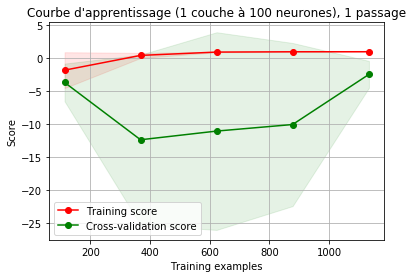

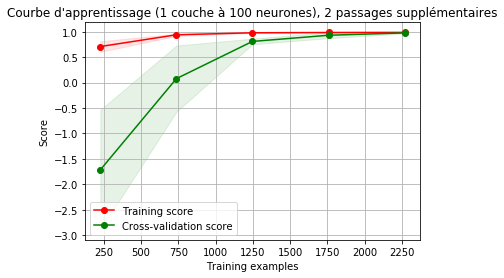

In [20]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt



title = "Courbe d'apprentissage (1 couche à 100 neurones), 1 passage"

estimator = neural_network.MLPRegressor(hidden_layer_sizes=(100, ))
plot_learning_curve(estimator, title, X_test, Y_test, n_jobs=4)

title = "Courbe d'apprentissage (1 couche à 100 neurones), 2 passages supplémentaires"

plot_learning_curve(estimator, title, X_test*2, Y_test*2, n_jobs=4)


plt.show()

On voit que même en prenant une base d'apprentissage conséquente, le fait de repasset par les mêmes valeurs deux fois donne de très bon résultats. Il semblerait donc qu'une couche de 100 neurones soit suffisante pour répondre à notre problème, à condition d'utiliser la fonction d'activation ReLu.

Pour essyer de comprendre pourquoi mon apprentissage online était peu efficace, regardons les courbes obtenues avec les paramètres choisis pendant le projet : fonction d'activation sigmoïde, et une couche à 10 neurones.

NB : je ne renseignerai que la topologie du réseau et la fonction d'activation pour le moment.

<module 'matplotlib.pyplot' from 'C:\\Users\\gadey\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

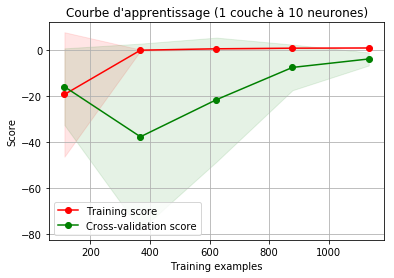

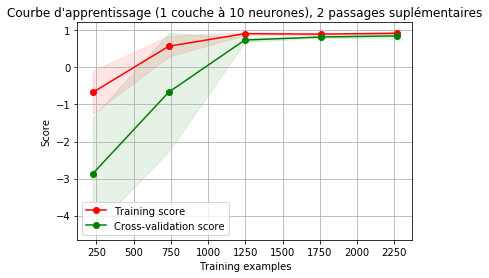

In [19]:
title = "Courbe d'apprentissage (1 couche à 10 neurones)"

estimator = neural_network.MLPRegressor(hidden_layer_sizes=(10, ), activation='logistic')
plot_learning_curve(estimator, title, X_test, Y_test, n_jobs=4)

title = "Courbe d'apprentissage (1 couche à 10 neurones), 2 passages suplémentaires"

plot_learning_curve(estimator, title, X_test*2, Y_test*2, n_jobs=4)

Les paramètres du réseau ne semblent pas poser de problème : 
    
    - La valeur de l'erreur reste élevée après un passage, mais elle a l'air de converger.
    - Plusieurs passages semblent bien corriger le problème.

Il me semble que le problème vient du fait que l'online training ne fournit pas au réseau assez de valeurs différentes au réseau pour que l'apprentissage se passe bien.

Je vais donc essayer de faire fonctionner le robot en ayant au préalable entrainé le réseau avec la même base de test que j'ai utilisée ici. 